

# Project: Investigate a Dataset - [TMDb-movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset contains data about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.


### Question(s) for Analysis
>### what genre makes the most revenue?
>### the relation between popularity and revenue?
>### does spending more on budget increase the movie's revenue and popularity?


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()


<a id='wrangling'></a>
## Data Wrangling

> ### loading the data into a dataframe 

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# check for features with missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


### Data Cleaning
>#### choosing the columns that i will work on and are related to the answers of the questions
 

In [4]:

df = df[['popularity','genres','revenue','budget','original_title']]
print(df.shape)
df.info()

(10866, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 5 columns):
popularity        10866 non-null float64
genres            10843 non-null object
revenue           10866 non-null int64
budget            10866 non-null int64
original_title    10866 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 424.5+ KB


# Cleaning the rows with missing values and duplicates

In [5]:
df.dropna(inplace=True, axis=0, how='any')
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 5 columns):
popularity        10842 non-null float64
genres            10842 non-null object
revenue           10842 non-null int64
budget            10842 non-null int64
original_title    10842 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 508.2+ KB


<a id='eda'></a>
## Exploratory Data Analysis




### Question (1)(What genre makes the most revenue?)
> ###  we simplify the genres column by choosing the first genre of each movie which will limit the accuracy but its cleaner to work with 

In [6]:
genres = [x.split('|')[0] for x in df['genres']]
df['genres']= genres


#### we create a dataframe for containing the data of these  genres
> we remove the 0 revenue samples for a more accurate analysis

In [7]:
df_genre =df[df['revenue']!=0]
df_genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4849 entries, 0 to 10848
Data columns (total 5 columns):
popularity        4849 non-null float64
genres            4849 non-null object
revenue           4849 non-null int64
budget            4849 non-null int64
original_title    4849 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 227.3+ KB


### In this section we creat a function that group the data by genres and get the sum of the revenue of each genre 
> #### we use the .groupby method and sum() method to get our data
> #### we sort the values to descending order for a better visual
> #### we plot a 'bar' chart to visualize the data and use custom settings to make it look better

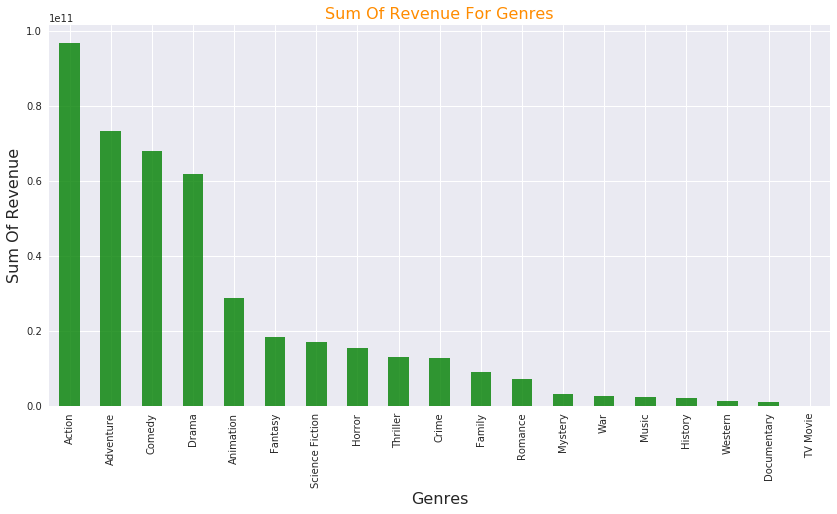

In [8]:
def plot_sum_y(df,xcol,ycol):
    """this function takes in a data frame and x column and y column and plot a bar chart for xcol with sum of the ycol.
        it also organises it and label the x, y axis with the names of provided columns"""
    df=  df.groupby(xcol).sum()[ycol].sort_values(ascending=False)
    df.plot(kind='bar', figsize=(14,7), alpha=.8, color='Green' )
    plt.title('Sum Of {} For {}'.format(ycol,xcol).title(), fontsize=16, color = 'Darkorange')
    plt.ylabel('Sum Of {}'.format(ycol).title(),fontsize=16 )
    plt.xlabel('{}'.format(xcol).title(), fontsize=16);
    
plot_sum_y(df_genre,'genres','revenue')

### we Calculate the average revenue for each genre and visualise it using a bar chart
> ### we create a function that takes in a data frame and two columns names as a string and plot the mean of the y column for
each value of the x column

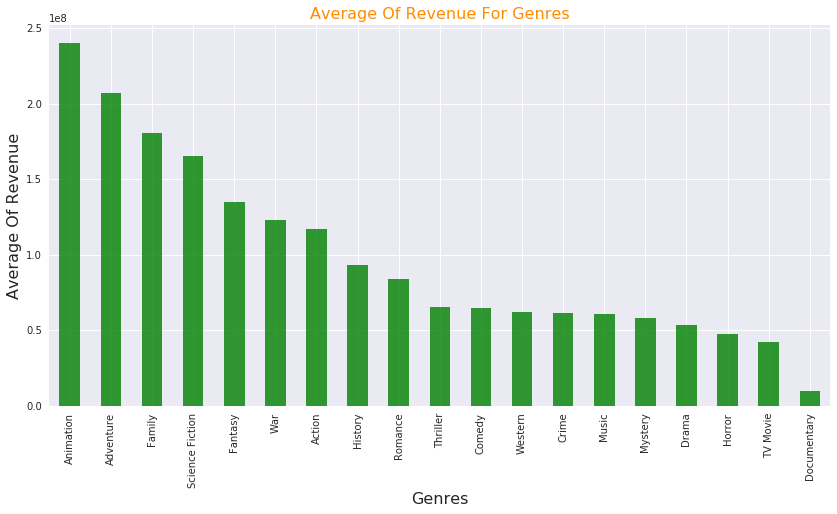

In [9]:
def plot_mean_y(df,xcol,ycol):
    """this function takes in a data frame and x column and y column and plot a bar chart for xcol with the mean of the ycol.
        it also organises it and label the x, y axis with the names of provided columns"""
    df=  df.groupby(xcol).mean()[ycol].sort_values(ascending=False)
    df.plot(kind='bar', figsize=(14,7), alpha=.8, color='Green' )
    plt.title('Average Of {} For {}'.format(ycol,xcol).title(), fontsize=16, color = 'Darkorange')
    plt.ylabel('Average Of {}'.format(ycol).title(),fontsize=16 )
    plt.xlabel('{}'.format(xcol).title(), fontsize=16);
plot_mean_y(df_genre,'genres','revenue')

### Question(2)   (The relation between popularity and revenue?)
>### we use a scatter plot to visualize the relation between the popularity and revenue


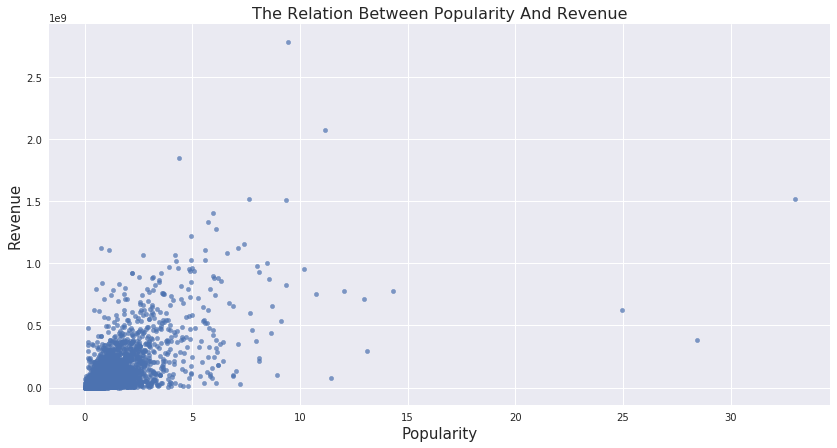

In [10]:
#we create a data frame for the scatter plot which contains no 0 values in revenue
df_scatter= df_genre.copy()
def plot_scatter(df,xcol,ycol):
    '''this function plots a scatter plot between the given x,y columns in the given dataframe df'''
    df_scatter.plot.scatter(x=xcol, y=ycol , alpha=.7,figsize=(14,7))
    plt.title('The Relation Between {} And {}'.format(xcol,ycol).title() ,fontsize=16)
    plt.xlabel('{}'.format(xcol).title(), fontsize=15)
    plt.ylabel('{}'.format(ycol).title(), fontsize=15);
plot_scatter(df_scatter,'popularity','revenue')

### Question(3) (The Relation Between Budget And Revenue?)
>#### we use a scatter plot to visualise the analysis and find any correlation between the budget and revenue.

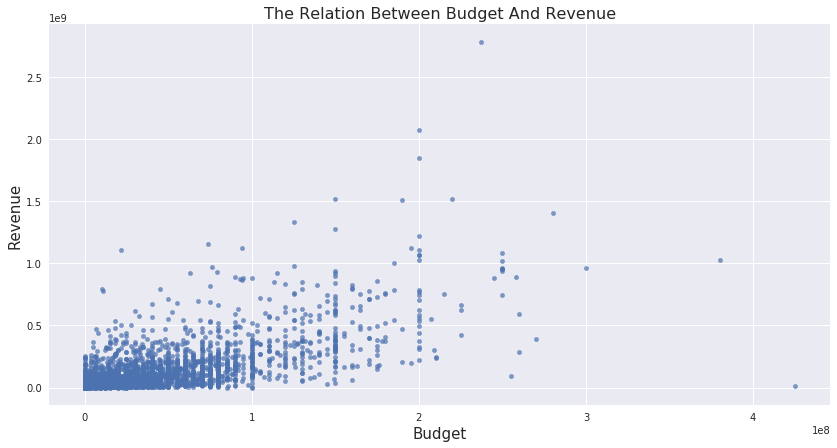

In [11]:
# we use the plot_scatter function we created earlier to plot the scatter of the budget and revenue
plot_scatter(df_scatter,'budget','revenue')

<a id='conclusions'></a>
## Conclusions

### what genre makes the most revenue?
> #### For the relation between the Genre and Revenue we can conclude based on the given data considering the limitation of the data used that the genre that has the highest total Revenue is the Action genre, and the genre with the highest average revenue per movie is Animation
**Note**: the data samples used in this analysis are only a portion of the total dataset which makes it less accurate  

### the relation between popularity and revenue?
> #### After analysing and visualising the dataset, The relation between popularity and Revenue is not obvious. using a scatter plot shows no apparent correlation between the two . 

### does spending more on budget increase the movie's revenue and popularity?
> #### After analysing and visualising the dataset, The relation between budget and Revenue is not obvious. using a scatter plot shows no apparent correlation between the two. But its showing some positive correlation even tho its almost neglible 






In [12]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0